In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("dadosabertos_graduacao_quantitativo-de-alunos.xlsx")

Começando a EDA

In [46]:
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2134 entries, 0 to 2133
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CodCurso      2134 non-null   int64 
 1   NomeCurso     2134 non-null   object
 2   Ano           2134 non-null   int64 
 3   Periodo       2134 non-null   int64 
 4   Vinculados    2134 non-null   int64 
 5   Matriculados  2134 non-null   int64 
 6   Ingressantes  2134 non-null   int64 
 7   Diplomados    2134 non-null   int64 
 8   Evadidos      2134 non-null   int64 
dtypes: int64(8), object(1)
memory usage: 150.2+ KB


,CodCurso,Ano,Periodo,Vinculados,Matriculados,Ingressantes,Diplomados,Evadidos
count,2134.000000,2134.000000,2134.000000,2134.000000,2134.000000,2134.00000,2134.000000,2134.000000
mean,634.377226,2016.495783,1.480319,393.336926,345.304592,39.91940,19.800375,16.964855
std,450.453556,3.937954,0.499730,346.838418,309.233608,42.29803,25.295691,21.530845
min,298.000000,2010.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000
25%,318.000000,2013.000000,1.000000,160.000000,138.000000,7.00000,1.000000,3.000000
50%,338.000000,2017.000000,1.000000,256.000000,226.000000,32.00000,12.000000,10.000000
75%,907.000000,2020.000000,2.000000,582.750000,496.750000,53.00000,30.000000,22.000000
max,1880.000000,2023.000000,2.000000,1996.000000,1901.000000,406.00000,308.000000,264.000000


Relação que pode haver entre ingressantes e evadidos

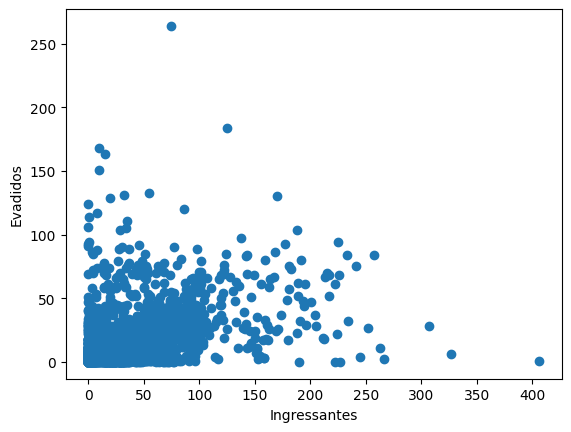

In [48]:
# Gráfico de dispersão
plt.scatter(df['Ingressantes'], df['Evadidos'])
plt.xlabel("Ingressantes")
plt.ylabel("Evadidos")
plt.show()

Dados brutos

In [49]:
display(df)

,CodCurso,NomeCurso,Ano,Periodo,Vinculados,Matriculados,Ingressantes,Diplomados,Evadidos
0,298,ADMINISTRAÇÃO,2010,1,1501,1349,169,91,24
1,583,ADMINISTRAÇÃO - EAD,2010,1,351,345,1,0,6
2,299,AGRONOMIA,2010,1,494,448,50,31,19
3,300,ARQUITETURA E URBANISMO,2010,1,625,578,53,41,12
4,301,ARQUIVOLOGIA,2010,1,157,134,30,4,6
...,...,...,...,...,...,...,...,...,...
2129,1490,RELAÇÕES PÚBLICAS,2023,1,281,248,26,0,1
2130,806,SAÚDE COLETIVA,2023,1,231,158,31,0,2
2131,907,SERVIÇO SOCIAL,2023,1,207,180,48,0,1
2132,302,TEATRO,2023,1,242,205,39,0,1


Densidade por curso e evasão por curso

In [50]:
dens_por_curso = df[["NomeCurso","Ingressantes"]].groupby("NomeCurso").sum()

In [51]:
display(dens_por_curso)

,Ingressantes
NomeCurso,
ADMINISTRAÇÃO,4283
ADMINISTRAÇÃO - EAD,1
ADMINISTRAÇÃO PÚBLICA E SOCIAL,714
AGRONOMIA,1248
ARQUITETURA E URBANISMO,1479
...,...
SAÚDE COLETIVA,785
SERVIÇO SOCIAL,497
TEATRO,623


Ordenando ingressantes em ordem descrescente

In [52]:
dens_por_curso.sort_values(by="Ingressantes",ascending=False)

,Ingressantes
NomeCurso,
CIÊNCIAS JURÍDICAS E SOCIAIS,4306
ADMINISTRAÇÃO,4283
LETRAS,3390
CIÊNCIAS SOCIAIS,2798
EDUCAÇÃO FÍSICA,2544
...,...
ADMINISTRAÇÃO - EAD,1
MÚSICA - ENSINO A DISTÂNCIA - EAD,0
ARTES VISUAIS - ENSINO A DISTÂNCIA - EAD,0


In [53]:
dens_por_curso.loc["CIÊNCIA DA COMPUTAÇÃO"]

Ingressantes    1693
Name: CIÊNCIA DA COMPUTAÇÃO, dtype: int64

In [ ]:
ev_curso = df[["NomeCurso","Evadidos"]].groupby("NomeCurso").sum()

In [54]:
display(ev_curso)

,Evadidos
NomeCurso,
ADMINISTRAÇÃO,1486
ADMINISTRAÇÃO - EAD,36
ADMINISTRAÇÃO PÚBLICA E SOCIAL,273
AGRONOMIA,439
ARQUITETURA E URBANISMO,394
...,...
SAÚDE COLETIVA,372
SERVIÇO SOCIAL,111
TEATRO,222


In [55]:
ev_curso.sort_values(by="Evadidos",ascending=False)

,Evadidos
NomeCurso,
CIÊNCIAS SOCIAIS,1892
LETRAS,1750
MATEMÁTICA,1542
ADMINISTRAÇÃO,1486
FÍSICA,1485
...,...
CIÊNCIAS BIOLÓGICAS - BIOLOGIA MARINHA,5
DESENVOLVIMENTO REGIONAL - LITORAL NORTE,4
ENGENHARIA DE SERVIÇOS - LITORAL NORTE,1


In [56]:
ev_curso.loc["CIÊNCIA DA COMPUTAÇÃO"]

Evadidos    702
Name: CIÊNCIA DA COMPUTAÇÃO, dtype: int64

In [57]:
ing_ufrgs = df[["Ano","Ingressantes"]].groupby("Ano").sum()

In [58]:
display(ing_ufrgs)

,Ingressantes
Ano,
2010,5093
2011,5748
2012,6163
2013,6476
2014,7085
2015,6809
2016,6690
2017,6255
2018,7128


In [59]:
ing_ufrgs.sort_values(by="Ingressantes",ascending=False)

,Ingressantes
Ano,
2018,7128
2014,7085
2015,6809
2020,6765
2016,6690
2013,6476
2017,6255
2019,6183
2012,6163


In [60]:
curso_ano_ing = df[["Ano","NomeCurso","Ingressantes"]].groupby("Ano").sum()

In [61]:
display(curso_ano_ing)

,NomeCurso,Ingressantes
Ano,,
2010,ADMINISTRAÇÃOADMINISTRAÇÃO - EADAGRONOMIAARQUI...,5093
2011,ADMINISTRAÇÃOADMINISTRAÇÃO - EADAGRONOMIAARQUI...,5748
2012,ADMINISTRAÇÃOAGRONOMIAARQUITETURA E URBANISMOA...,6163
2013,ADMINISTRAÇÃOAGRONOMIAARQUITETURA E URBANISMOA...,6476
2014,ADMINISTRAÇÃOAGRONOMIAARQUITETURA E URBANISMOA...,7085
2015,ADMINISTRAÇÃOADMINISTRAÇÃO PÚBLICA E SOCIALAGR...,6809
2016,ADMINISTRAÇÃOADMINISTRAÇÃO PÚBLICA E SOCIALAGR...,6690
2017,ADMINISTRAÇÃOADMINISTRAÇÃO PÚBLICA E SOCIALAGR...,6255
2018,ADMINISTRAÇÃOADMINISTRAÇÃO PÚBLICA E SOCIALAGR...,7128


In [62]:
dip_curso = df[["NomeCurso","Diplomados"]].groupby("NomeCurso").sum()

In [63]:
display(dip_curso)

,Diplomados
NomeCurso,
ADMINISTRAÇÃO,2342
ADMINISTRAÇÃO - EAD,315
ADMINISTRAÇÃO PÚBLICA E SOCIAL,41
AGRONOMIA,763
ARQUITETURA E URBANISMO,978
...,...
SAÚDE COLETIVA,236
SERVIÇO SOCIAL,179
TEATRO,308


In [64]:
dip_curso.sort_values(by="Diplomados",ascending=False)

,Diplomados
NomeCurso,
CIÊNCIAS JURÍDICAS E SOCIAIS,2434
ADMINISTRAÇÃO,2342
MEDICINA,1789
EDUCAÇÃO FÍSICA,1641
LETRAS,1435
...,...
DESENVOLVIMENTO REGIONAL - LITORAL NORTE,1
BIBLIOTECONOMIA - ENSINO A DISTÂNCIA - EAD,0
CIÊNCIAS BIOLÓGICAS - BIOLOGIA MARINHA,0


In [65]:
dip_curso.loc["CIÊNCIA DA COMPUTAÇÃO"]

Diplomados    746
Name: CIÊNCIA DA COMPUTAÇÃO, dtype: int64